# Data Collection, Ingestion, Validation and EDA

## 5. Data Collection

### Dataset Source
The dataset used for this project was sourced from Kaggle and contains anonymized cardiovascular health records collected for research and educational purposes.

### Dataset Characteristics
- **Type:** csv
- **Total records:** ~70,000
- **Features:** Demographic, clinical, and lifestyle attributes
- **Target variable:** cardio
    - 0 → No cardiovascular disease
    - 1 → Cardiovascular disease present

### Justification for Dataset Selection
This dataset is appropriate for the problem because:
- It represents a real-world healthcare classification scenario
- Features are clinically relevant to cardiovascular risk
- The target variable aligns directly with the objective of early risk identification

## 6. Data Ingestion
### Ingestion Method

The dataset was provided in CSV format and ingested into the analysis environment using Python’s pandas library.

Code Implementation

In [151]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load raw dataset
df = pd.read_csv("../data/raw/cardio_train.csv", sep=";")

# Preview the data
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [152]:
#fixing age from days to years
df['age'] = (df['age'] / 365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


## 7. Data Validation
### Objective

The goal of data validation is to ensure that the ingested data is structurally correct, complete, and logically valid before performing any analysis or modeling.
This step focuses on verifying schema, data types, value ranges, and target consistency.

### 7.1 Schema & Structural Validation
Checks Performed

* Number of rows and columns

* Column names and expected schema

* Data types of each feature

In [153]:
# Dataset shape
df.shape


(70000, 13)

In [154]:
# Schema validation

# Column names and data types
df.info()

#Target Variable Validation
# Distribution of target variable
df['cardio'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


cardio
0    35021
1    34979
Name: count, dtype: int64

In [155]:
# Completeness validation
# Check for missing values
df.isnull().sum()



id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [156]:
# Uniqueness validation
# Check for duplicate records
df.duplicated().sum()

np.int64(0)

In [157]:
# Statistical summary
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# Logical Assumptions Validation

# Age should be positive
display((df['age'] <= 0).sum())

# Height and weight should be positive
display((df['height'] <= 0).sum())
display((df['weight'] <= 0).sum())
# Systolic BP should be greater than Diastolic BP
display((df['ap_hi'] <= df['ap_lo']).sum())

# Cholesterol and glucose should be in expected ordinal range
display((~df['cholesterol'].isin([1, 2, 3])).sum())
display((~df['gluc'].isin([1, 2, 3])).sum())

# Lifestyle features should be binary
display((~df['smoke'].isin([0, 1])).sum())
display((~df['alco'].isin([0, 1])).sum())
display((~df['active'].isin([0, 1])).sum())

# Target variable should be binary
display((~df['cardio'].isin([0, 1])).sum())

np.int64(0)

np.int64(0)

np.int64(0)

np.int64(1236)

np.int64(0)

np.int64(0)

np.int64(0)

np.int64(0)

np.int64(0)

np.int64(0)

### Logical Assumptions Validation

Domain-specific logical constraints were applied to validate the consistency of clinical and lifestyle features.
While most features satisfied expected constraints, 1,234 records violated the medical assumption that systolic blood pressure should exceed diastolic blood pressure.

These inconsistencies indicate data quality issues that must be addressed during the Data Quality Checks and Data Cleaning stages.

## 8. Data Quality Checks
### Objective

The objective of data quality checks is to assess the severity, distribution, and impact of issues identified during data validation.
This step focuses on outliers, inconsistencies, distributions, and class balance to guide informed data cleaning decisions.

In [159]:
#8.1 Completeness (Quality view, not validation)
"""What we checks
Even if no missing values exist, we confirm completeness
Completeness affects trust"""
df.isnull().mean() * 100


id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [160]:
#8.2 Target Class Balance (VERY important for ML)
"""What we check
Is the target skewed?
Will accuracy be misleading?"""
df['cardio'].value_counts(normalize=True)


cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [161]:
#8.3 Distribution & Outlier Severity (Numerical Features)
"""What we check
Are extreme values rare or dominant?
Do outliers distort statistics?"""

df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


Interpretation
* Age is realistic but stored in days
* Height and weight have extreme min/max values
* Blood pressure features show extreme spread and invalid values
* BP standard deviation >> mean → heavy noise
* Blood pressure is the highest-risk feature

In [162]:
#8.4 Medical Consistency Severity (Critical)
"""What we check
How many rows violate medical rules?"""

invalid_bp_relation = (df['ap_hi'] <= df['ap_lo']).sum()
invalid_bp_relation, invalid_bp_relation / len(df) * 100

(np.int64(1236), np.float64(1.7657142857142858))

Interpretation
* ~1,236 records violate systolic > diastolic rule
* ~1.7% of dataset affected
* Small enough to clean, large enough to matter

In [163]:
# 8.5 Extreme Value Severity (BP Focus)
"""What we check
How extreme are BP values?
"""
(df['ap_hi'] < 50).sum(), (df['ap_hi'] > 300).sum()

(np.int64(188), np.int64(40))

In [164]:
(df['ap_lo'] < 30).sum(), (df['ap_lo'] > 200).sum()

(np.int64(53), np.int64(953))

In [165]:
# 8.6 Categorical Feature Quality
"""What we check
Unexpected category values
Skew that may affect learning"""

df[['cholesterol', 'gluc', 'smoke', 'alco', 'active']].apply(lambda x: x.value_counts())

,cholesterol,gluc,smoke,alco,active
0,NaN,NaN,63831.0,66236.0,13739.0
1,52385.0,59479.0,6169.0,3764.0,56261.0
2,9549.0,5190.0,NaN,NaN,NaN
3,8066.0,5331.0,NaN,NaN,NaN


In [166]:
# 8.7 Duplicate Records Impact
"""What we check
Duplicate inflation risk
Code"""
df.duplicated().sum()

np.int64(0)

## 9. Data Understanding

In [167]:
# Step 9: Data Understanding

print("="*60)
print("DATA UNDERSTANDING")
print("="*60)

print("\nDataset Shape:", df.shape)
print(f"Features: {df.shape[1]}")
print(f"Samples: {df.shape[0]}")

print("\nFeature Types:")
print(df.dtypes)

print("\nTarget Distribution:")
target_dist = df['cardio'].value_counts()
print(target_dist)
print(f"\nClass Balance:")
print(df['cardio'].value_counts(normalize=True))

balance_ratio = target_dist.min() / target_dist.max()
print(f"\nBalance Ratio: {balance_ratio:.2f}")
if balance_ratio < 0.8:
    print("⚠ Classes are imbalanced (ratio < 0.8)")
else:
    print("✓ Classes are balanced")

DATA UNDERSTANDING

Dataset Shape: (70000, 13)
Features: 13
Samples: 70000

Feature Types:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Target Distribution:
cardio
0    35021
1    34979
Name: count, dtype: int64

Class Balance:
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

Balance Ratio: 1.00
✓ Classes are balanced


# 10. Exploratory Data Analysis (EDA)

EXPLORATORY DATA ANALYSIS


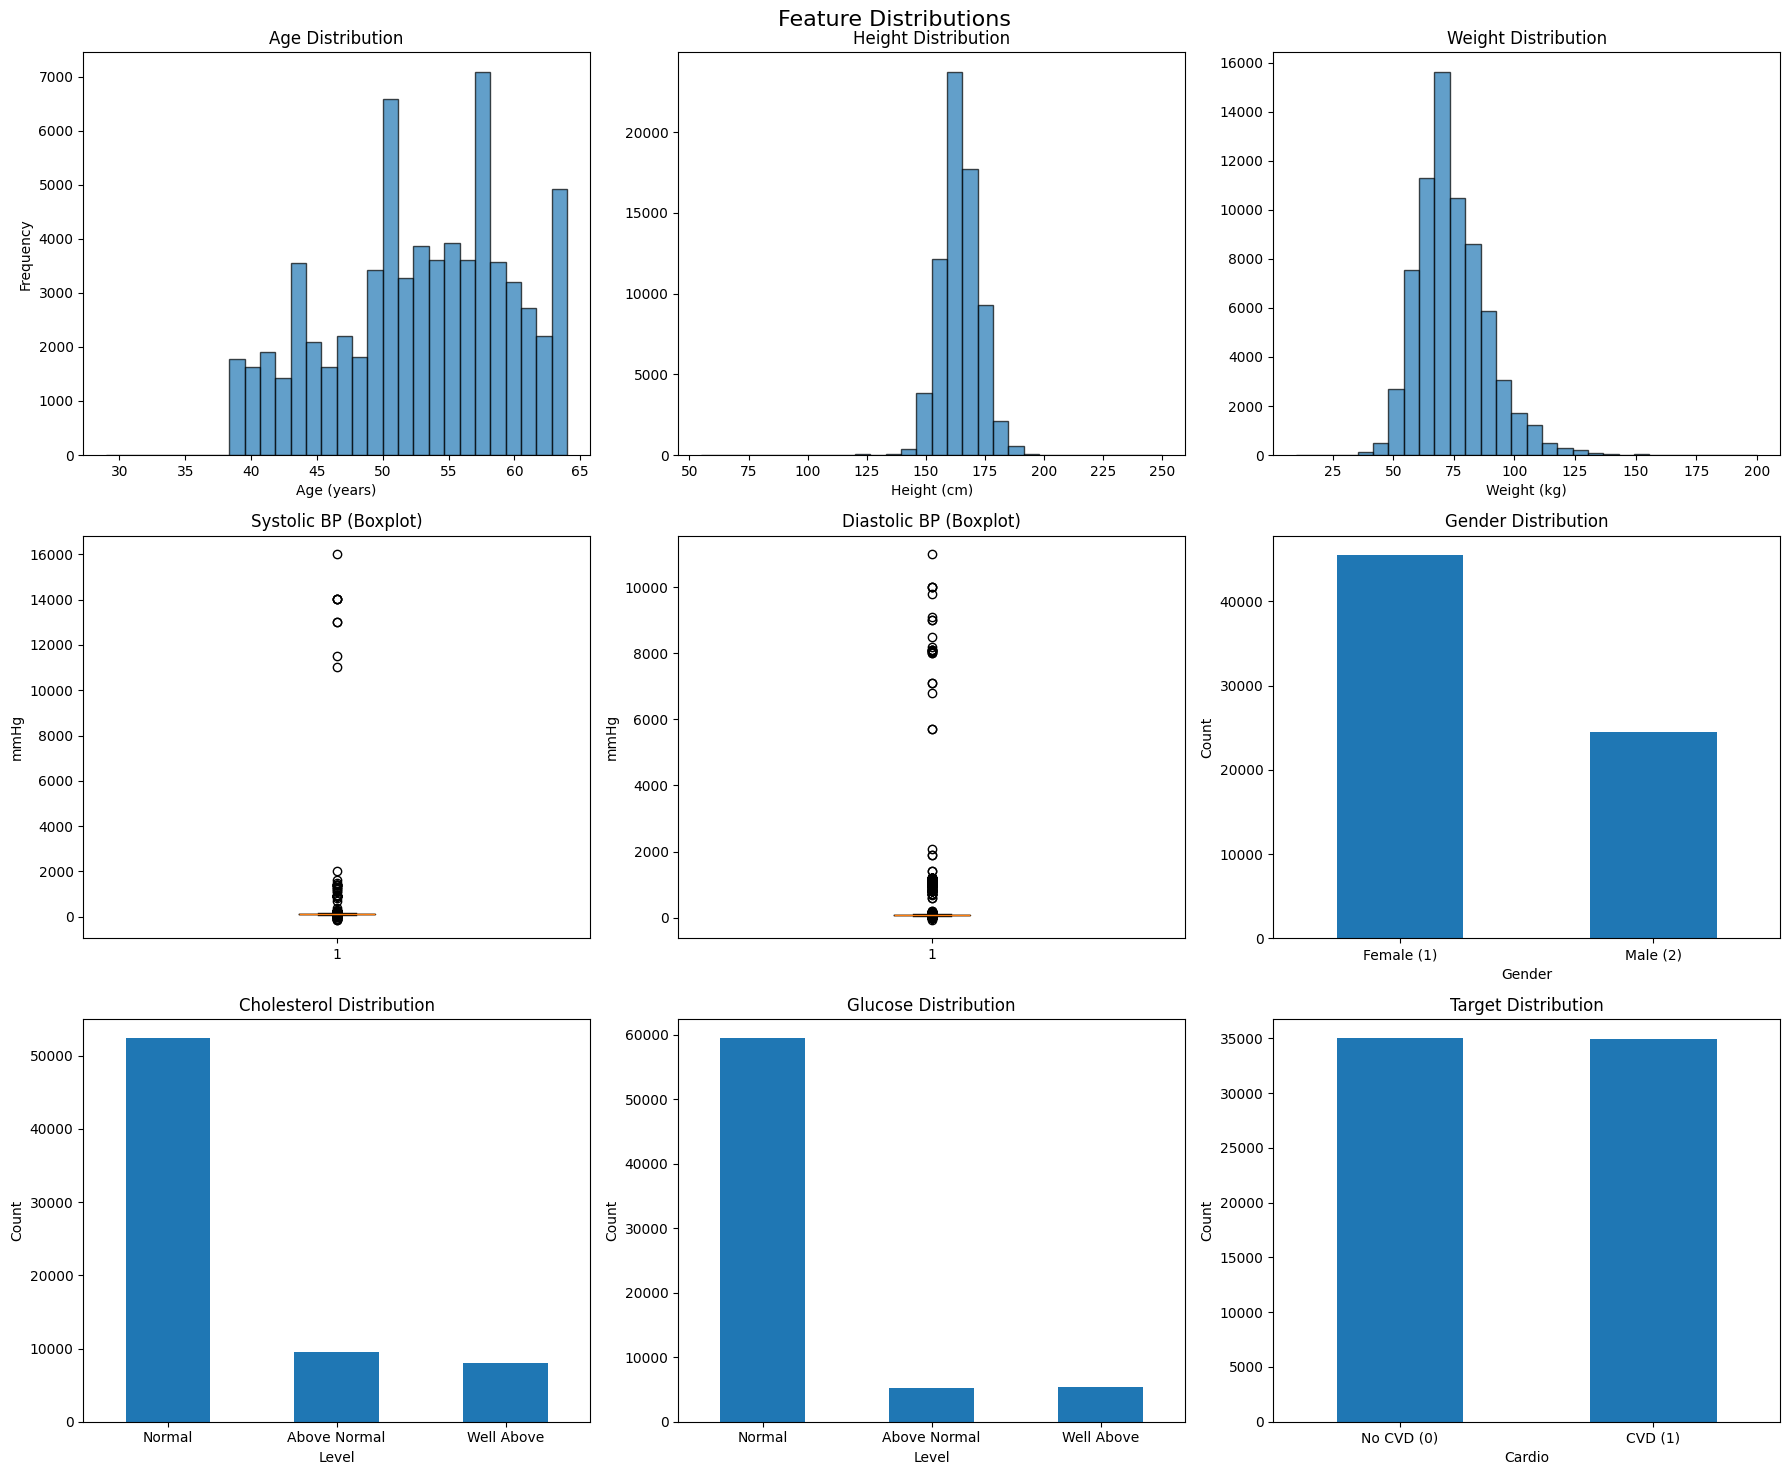

In [178]:
# Step 10: Exploratory Data Analysis

import matplotlib.pyplot as plt

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Feature Distributions", fontsize=16)

# -----------------------
# Histograms (continuous)
# -----------------------

# Age
axes[0, 0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age (years)")
axes[0, 0].set_ylabel("Frequency")

# Height
axes[0, 1].hist(df['height'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Height Distribution")
axes[0, 1].set_xlabel("Height (cm)")

# Weight
axes[0, 2].hist(df['weight'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title("Weight Distribution")
axes[0, 2].set_xlabel("Weight (kg)")

# -----------------------
# Boxplots (blood pressure)
# -----------------------

# Systolic BP
axes[1, 0].boxplot(df['ap_hi'], vert=True)
axes[1, 0].set_title("Systolic BP (Boxplot)")
axes[1, 0].set_ylabel("mmHg")

# Diastolic BP
axes[1, 1].boxplot(df['ap_lo'], vert=True)
axes[1, 1].set_title("Diastolic BP (Boxplot)")
axes[1, 1].set_ylabel("mmHg")

# -----------------------
# Bar charts (categorical)
# -----------------------

# Gender
df['gender'].value_counts().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title("Gender Distribution")
axes[1, 2].set_xlabel("Gender")
axes[1, 2].set_ylabel("Count")
axes[1, 2].set_xticklabels(['Female (1)', 'Male (2)'], rotation=0)

# Cholesterol
df['cholesterol'].value_counts().sort_index().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title("Cholesterol Distribution")
axes[2, 0].set_xlabel("Level")
axes[2, 0].set_ylabel("Count")
axes[2, 0].set_xticklabels(['Normal', 'Above Normal', 'Well Above'], rotation=0)

# Glucose
df['gluc'].value_counts().sort_index().plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title("Glucose Distribution")
axes[2, 1].set_xlabel("Level")
axes[2, 1].set_ylabel("Count")
axes[2, 1].set_xticklabels(['Normal', 'Above Normal', 'Well Above'], rotation=0)

# Target
df['cardio'].value_counts().plot(kind='bar', ax=axes[2, 2])
axes[2, 2].set_title("Target Distribution")
axes[2, 2].set_xlabel("Cardio")
axes[2, 2].set_ylabel("Count")
axes[2, 2].set_xticklabels(['No CVD (0)', 'CVD (1)'], rotation=0)

plt.tight_layout()
plt.show()


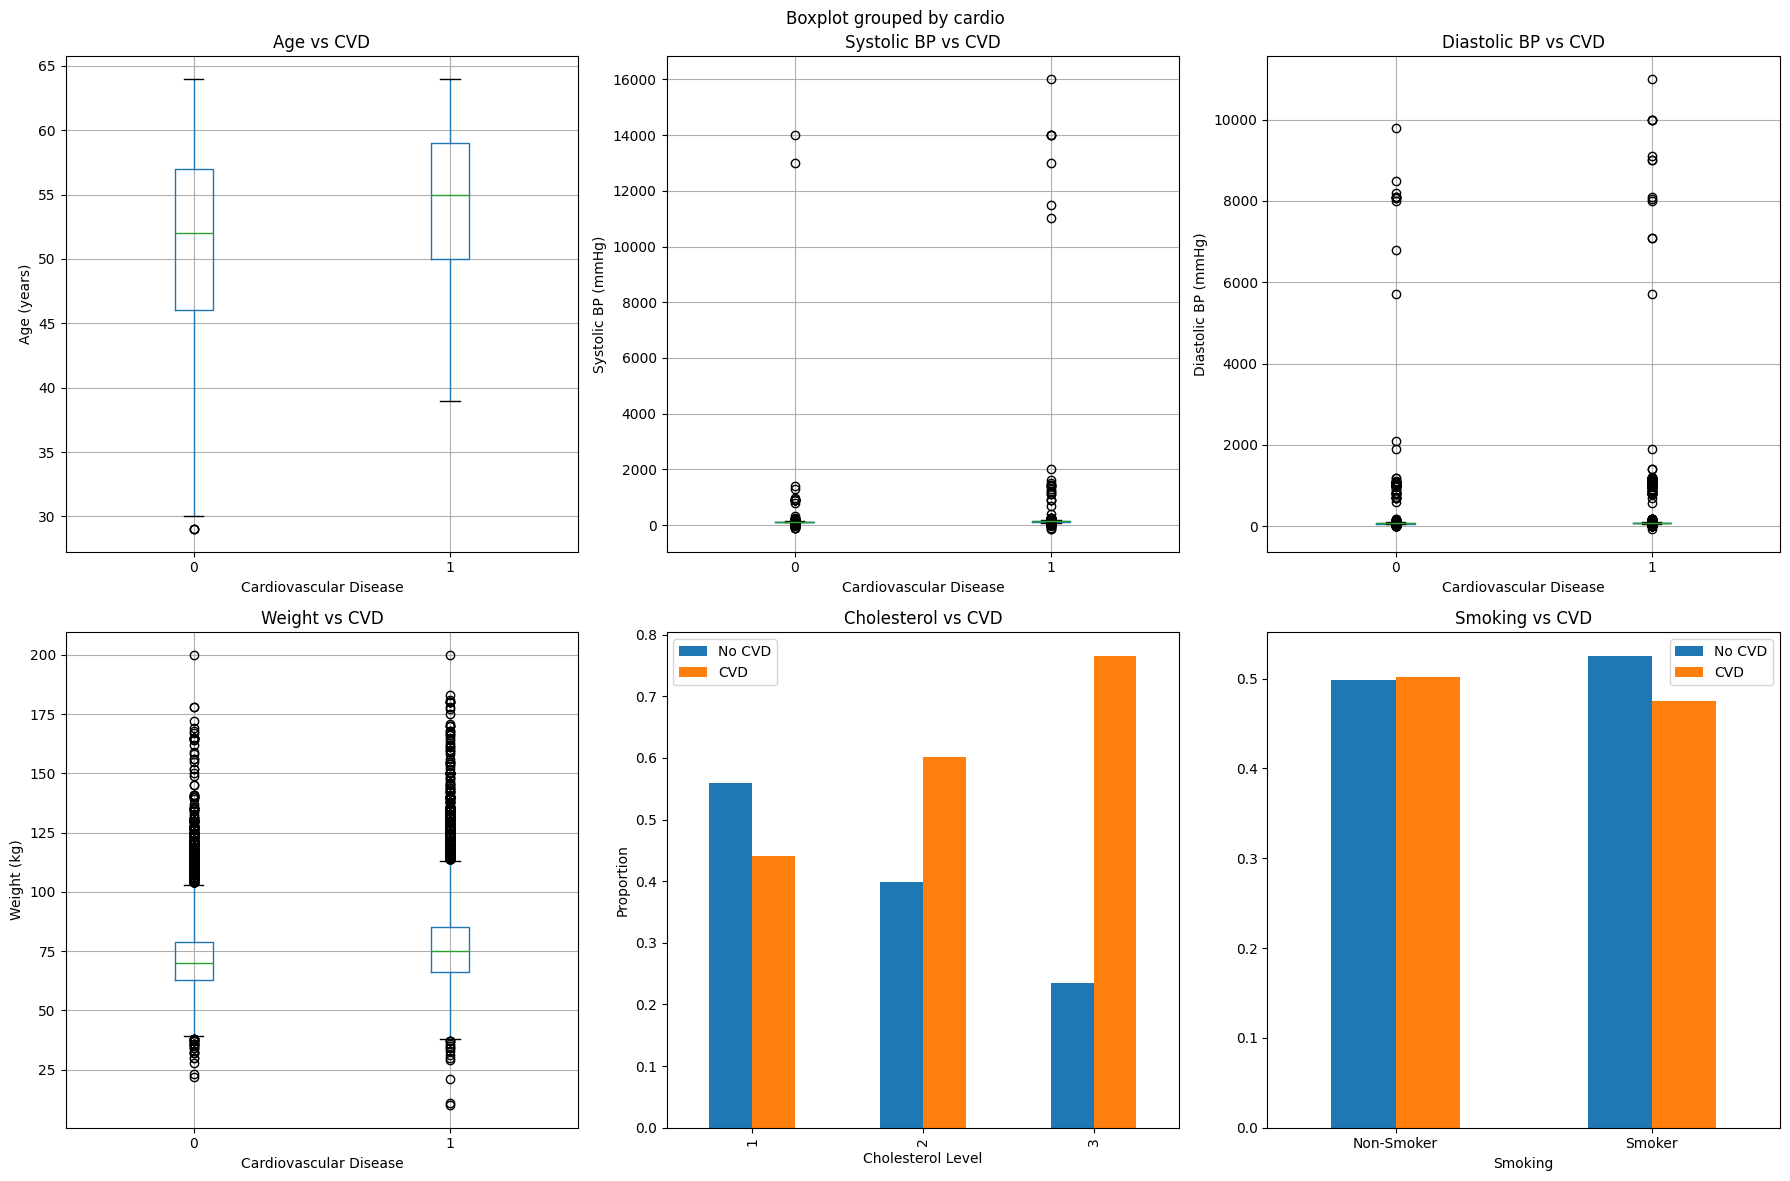

In [173]:
# Analyze features vs target

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Features vs Cardiovascular Disease', fontsize=16)

# Age vs Cardio
df.boxplot(column='age', by='cardio', ax=axes[0, 0])
axes[0, 0].set_title('Age vs CVD')
axes[0, 0].set_xlabel('Cardiovascular Disease')
axes[0, 0].set_ylabel('Age (years)')

# Systolic BP vs Cardio
df.boxplot(column='ap_hi', by='cardio', ax=axes[0, 1])
axes[0, 1].set_title('Systolic BP vs CVD')
axes[0, 1].set_xlabel('Cardiovascular Disease')
axes[0, 1].set_ylabel('Systolic BP (mmHg)')

# Diastolic BP vs Cardio
df.boxplot(column='ap_lo', by='cardio', ax=axes[0, 2])
axes[0, 2].set_title('Diastolic BP vs CVD')
axes[0, 2].set_xlabel('Cardiovascular Disease')
axes[0, 2].set_ylabel('Diastolic BP (mmHg)')

# Weight vs Cardio
df.boxplot(column='weight', by='cardio', ax=axes[1, 0])
axes[1, 0].set_title('Weight vs CVD')
axes[1, 0].set_xlabel('Cardiovascular Disease')
axes[1, 0].set_ylabel('Weight (kg)')

# Cholesterol vs Cardio
pd.crosstab(df['cholesterol'], df['cardio'], normalize='index').plot(
    kind='bar', ax=axes[1, 1], stacked=False
)
axes[1, 1].set_title('Cholesterol vs CVD')
axes[1, 1].set_xlabel('Cholesterol Level')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(['No CVD', 'CVD'])

# Smoking vs Cardio
pd.crosstab(df['smoke'], df['cardio'], normalize='index').plot(
    kind='bar', ax=axes[1, 2], stacked=False
)
axes[1, 2].set_title('Smoking vs CVD')
axes[1, 2].set_xlabel('Smoking')
axes[1, 2].set_xticklabels(['Non-Smoker', 'Smoker'], rotation=0)
axes[1, 2].legend(['No CVD', 'CVD'])

plt.tight_layout()
plt.show()

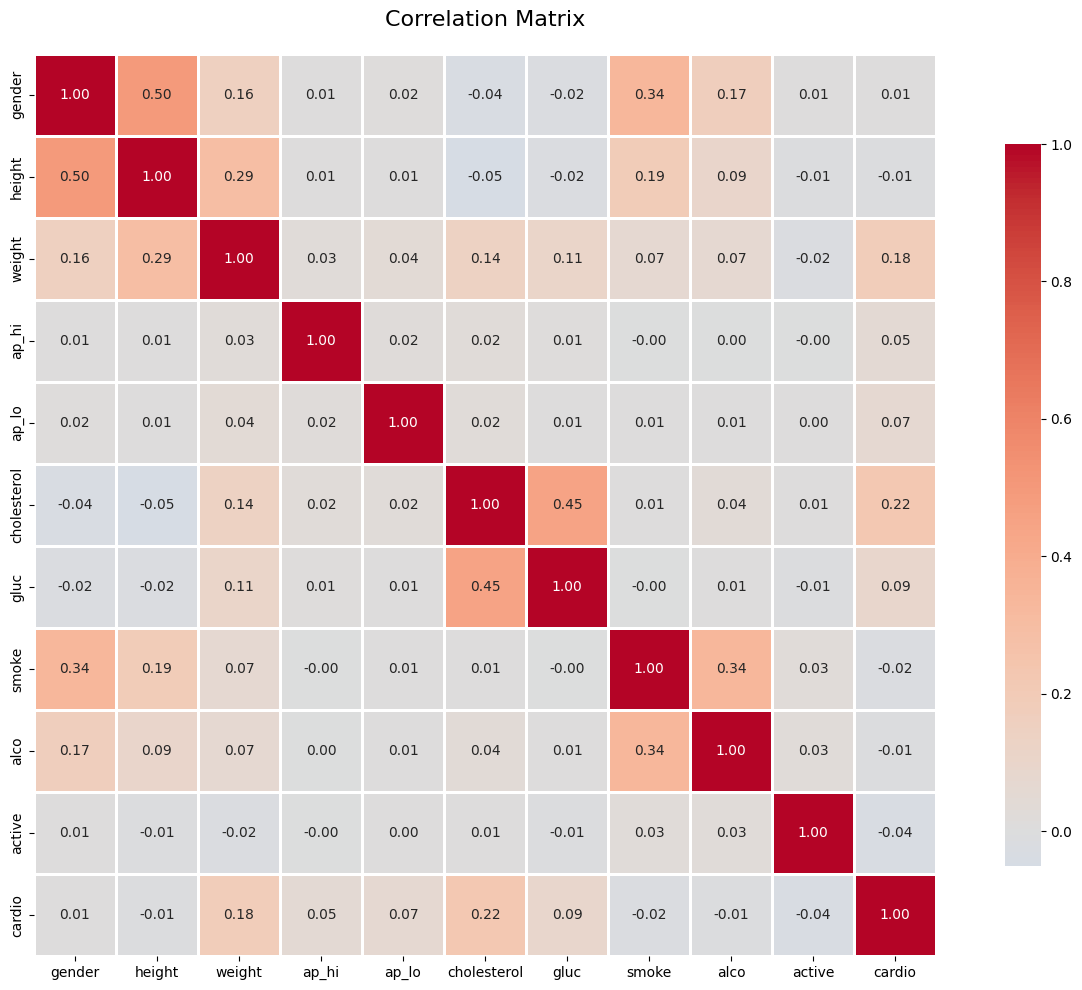


Correlation with Target (cardio):
cardio         1.000000
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


In [170]:
# Correlation matrix
plt.figure(figsize=(14, 10))

# Calculate correlation
corr = df.drop(['id', 'age'], axis=1).corr()

# Create heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (cardio):")
print(corr['cardio'].sort_values(ascending=False))

In [171]:
print("="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

# Age insight
age_cvd = df[df['cardio'] == 1]['age'].mean()
age_no_cvd = df[df['cardio'] == 0]['age'].mean()
print(f"\n1. AGE")
print(f"   - Average age with CVD: {age_cvd:.1f} years")
print(f"   - Average age without CVD: {age_no_cvd:.1f} years")
print(f"   - Difference: {age_cvd - age_no_cvd:.1f} years")

# BP insight
bp_hi_cvd = df[df['cardio'] == 1]['ap_hi'].mean()
bp_hi_no_cvd = df[df['cardio'] == 0]['ap_hi'].mean()
print(f"\n2. BLOOD PRESSURE")
print(f"   - Average systolic BP with CVD: {bp_hi_cvd:.1f} mmHg")
print(f"   - Average systolic BP without CVD: {bp_hi_no_cvd:.1f} mmHg")
print(f"   - Difference: {bp_hi_cvd - bp_hi_no_cvd:.1f} mmHg")

# Cholesterol insight
chol_cvd = df[df['cardio'] == 1]['cholesterol'].value_counts(normalize=True)
print(f"\n3. CHOLESTEROL")
print(f"   - Patients with CVD and high cholesterol: {chol_cvd.get(3, 0)*100:.1f}%")

# Gender insight
gender_cvd_rate = df.groupby('gender')['cardio'].mean()
print(f"\n4. GENDER")
print(f"   - CVD rate in females: {gender_cvd_rate[1]*100:.1f}%")
print(f"   - CVD rate in males: {gender_cvd_rate[2]*100:.1f}%")

print(f"\n{'='*60}")

KEY INSIGHTS FROM EDA

1. AGE
   - Average age with CVD: 54.5 years
   - Average age without CVD: 51.2 years
   - Difference: 3.2 years

2. BLOOD PRESSURE
   - Average systolic BP with CVD: 137.2 mmHg
   - Average systolic BP without CVD: 120.4 mmHg
   - Difference: 16.8 mmHg

3. CHOLESTEROL
   - Patients with CVD and high cholesterol: 17.7%

4. GENDER
   - CVD rate in females: 49.7%
   - CVD rate in males: 50.5%

